In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# Dữ liệu bắt đầu từ cột thứ nhất, do cột 0 là cột thời gian
data = pd.read_excel("milk-powder-IR.xlsx").iloc[:, 1:]

Tách ra ma trận tín hiệu và label

In [3]:
# Tách ra ma trận tín hiệu X và nhãn thật giả (y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape, y.shape)

(40, 601) (40,)


Chia tập train, test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [5]:
print(X_train.shape,X_test.shape, X_val.shape)

(22, 601) (12, 601) (6, 601)


Phổ IR của sữa giả

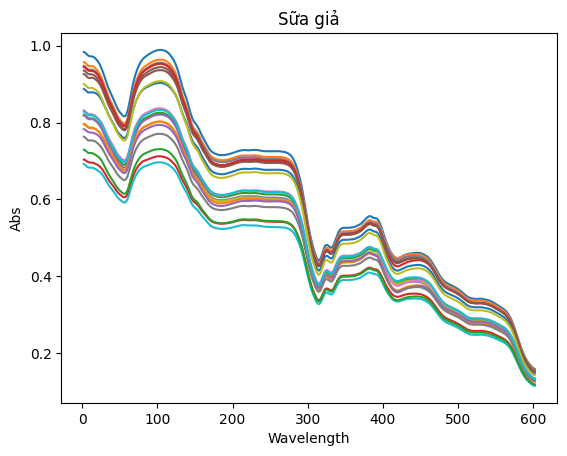

In [6]:
# Vẽ phổ IR của các mẫu sữa giả
loai_0 = X[y == 0]
plt.plot(loai_0.T)
plt.title('Sữa giả')
plt.xlabel('Wavelength')
plt.ylabel('Abs')
plt.show()

Phổ IR của sữa thật

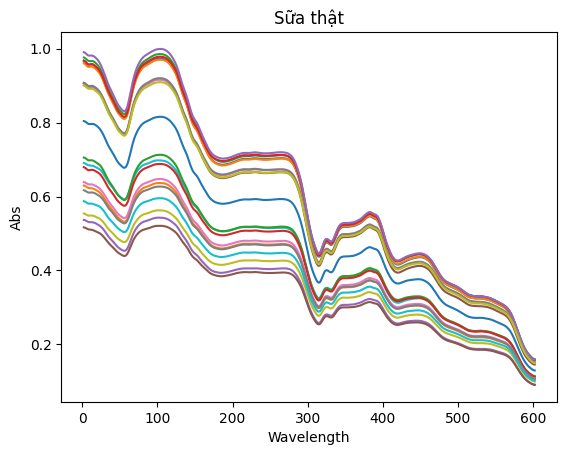

In [7]:
# Vẽ phổ IR của các mẫu sữa thật
loai_1 = X[y == 1]
plt.plot(loai_1.T)
plt.title('Sữa thật')
plt.xlabel('Wavelength')
plt.ylabel('Abs')
plt.show()

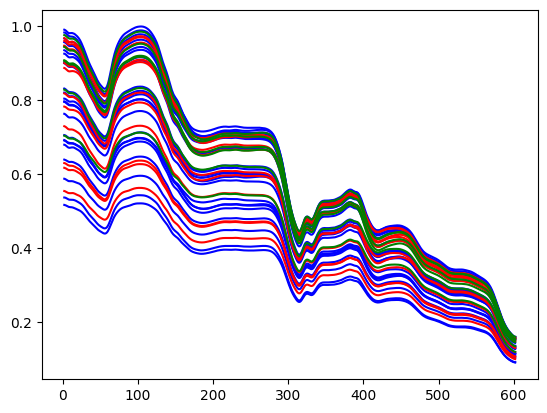

In [8]:
# Vẽ phổ IR của tập train, test và validate
plt.plot(X_train.T, c='b')
plt.plot(X_test.T, c='r')
plt.plot(X_val.T, c='g')
plt.show()

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [10]:
X_train.head()

,2,3,4,5,6,7,8,9,10,11,...,593,594,595,596,597,598,599,600,601,602
29,0.690780,0.690121,0.689149,0.687911,0.686644,0.685517,0.684801,0.684325,0.684106,0.684103,...,0.124913,0.123151,0.121538,0.120074,0.118680,0.117438,0.116281,0.115301,0.114553,0.114202
1,0.957030,0.956283,0.954865,0.952963,0.950793,0.948894,0.947323,0.946525,0.946486,0.946691,...,0.174589,0.171897,0.169390,0.167075,0.164913,0.162806,0.160894,0.159218,0.157946,0.157275
2,0.820556,0.819761,0.818431,0.816563,0.814516,0.812639,0.811317,0.810622,0.810478,0.810678,...,0.146762,0.144596,0.142509,0.140523,0.138639,0.136867,0.135308,0.134007,0.133048,0.132575
17,0.763082,0.762223,0.760687,0.758763,0.756698,0.754874,0.753633,0.753157,0.753189,0.753430,...,0.140692,0.138613,0.136655,0.134809,0.133034,0.131373,0.129821,0.128504,0.127496,0.126991
9,0.691971,0.691104,0.689522,0.687664,0.685605,0.683987,0.683041,0.682692,0.682732,0.682974,...,0.127518,0.125537,0.123706,0.122043,0.120493,0.119017,0.117648,0.116463,0.115525,0.114985


PCA

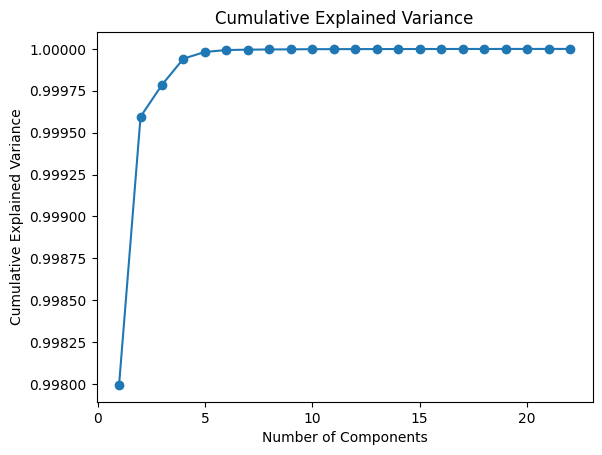

In [11]:
pca = PCA()
pca.fit(X_train, y_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
for i in range (1, X_train.shape[0]):
    # Tiến hành PCA với i cấu tử chính
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    # Tạo mô hình logistic và học X_train đã pca và y_train
    log_reg = LogisticRegression().fit(X_train_pca, y_train)
    # Sử dụng mô hình để dự đoán dựa trên X_val đã PCA
    y_val_pred = log_reg.predict(X_val_pca)
    # Tính toán độ chính xác so với giá trị thực tế
    print(f"Accuracy of {i} PC on validation:",accuracy_score(y_val, y_val_pred))

Accuracy of 1 PC on validation: 0.3333333333333333
Accuracy of 2 PC on validation: 0.8333333333333334
Accuracy of 3 PC on validation: 1.0
Accuracy of 4 PC on validation: 1.0
Accuracy of 5 PC on validation: 1.0
Accuracy of 6 PC on validation: 1.0
Accuracy of 7 PC on validation: 1.0
Accuracy of 8 PC on validation: 1.0
Accuracy of 9 PC on validation: 1.0
Accuracy of 10 PC on validation: 1.0
Accuracy of 11 PC on validation: 1.0
Accuracy of 12 PC on validation: 1.0
Accuracy of 13 PC on validation: 1.0
Accuracy of 14 PC on validation: 1.0
Accuracy of 15 PC on validation: 1.0
Accuracy of 16 PC on validation: 1.0
Accuracy of 17 PC on validation: 1.0
Accuracy of 18 PC on validation: 1.0
Accuracy of 19 PC on validation: 1.0
Accuracy of 20 PC on validation: 1.0
Accuracy of 21 PC on validation: 1.0


Độ chính xác + ma trận nhầm lẫn

Accuracy: 1.0
    Predict  Test
0         0     0
1         0     0
2         1     1
3         0     0
4         1     1
5         1     1
6         1     1
7         0     0
8         0     0
9         1     1
10        1     1
11        0     0


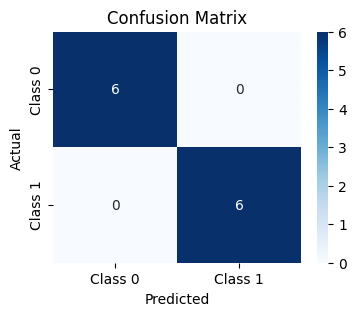

In [15]:
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

LR = LogisticRegression().fit(X_train_pca, y_train)
y_pred = LR.predict(X_test_pca)
print("Accuracy:",accuracy_score(y_test, y_pred))

# In ra bảng so sánh giá trị dự đoán và thực tế
pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test.values, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
print(final_df)
# In ra ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()